In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace (-1,1,100)

In [14]:
sigma = 0.1
beta = 0.2

In [15]:
A = np.exp(-(x**2)/2/(sigma**2))

In [16]:
phase = (beta*x/(sigma**2)) * np.exp(-(x**2)/2/(sigma**2))

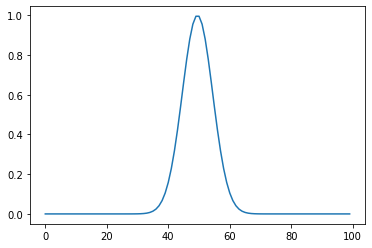

In [17]:
plt.plot(A)

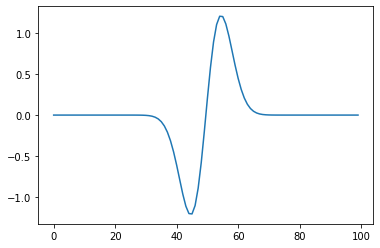

In [18]:
plt.plot(phase)

In [19]:
##################################

In [20]:
I = A * np.sin(phase)
Q = A * np.cos(phase)

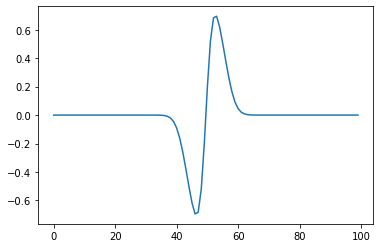

In [21]:
plt.plot(I)

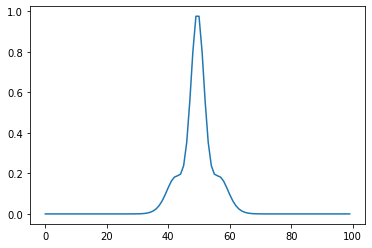

In [22]:
plt.plot(Q)

In [43]:
def gaussian_I_Q (amplitude = float, width = float, sigma = float, beta = float):

    """This method creates envelopes of I and Q signals to be fed to a IQ mixer.
    The I and Q signals are made in such a way that the aplitude of the signal is gaussian and its phase is gaussian derrivative.
    A.k.a this implements a DRAG gaussian pulse.

    INPUTS:
        amplitude - the amplitude scaler of the signal, takes value [0 to 1]
        width -  width of the gaussian in [sec]
        sigma - the sigma of the gaussian [sec]
        beta - the DRAG coefficient

    OUTPUTS:
        I component of the signal
        Q component of the signal
    """

    delta_t = 0.001

    segment_length = width / delta_t # how many dataponts we would need to express the signal
    segment_length = int(segment_length) # round it up

    how_many_sigmas_wide = width/sigma

    x = np.linspace (-how_many_sigmas_wide/2, how_many_sigmas_wide/2, segment_length)

    A = np.exp(-(x**2)/2/(sigma**2)) # Amplitude
    phase = (beta*x/(sigma**2)) * np.exp(-(x**2)/2/(sigma**2)) # Phase

    I = A * np.sin(phase)  
    Q = A * np.cos(phase)
    
    return I, Q
    
    
I, Q = gaussian_I_Q (amplitude = 1, width = 5, sigma = 1, beta = 0.2)

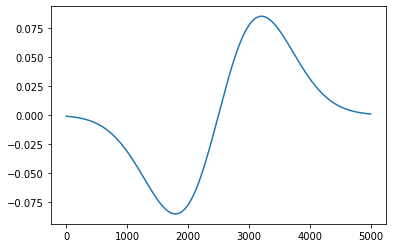

In [44]:
plt.plot(I)

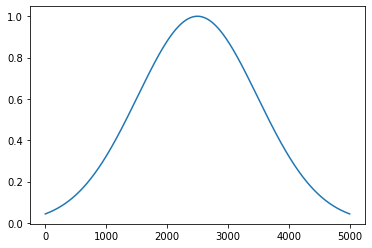

In [45]:
plt.plot(Q)